In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Carga del dataset

https://www.kaggle.com/datasets/zsinghrahulk/covertype-forest-cover-types/code

In [4]:
df = pd.read_csv("covertype.csv")  # El archivo original se llama "train.csv"
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

## 3.Data Cleaning

In [5]:
df[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']].head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,2596,51,3
1,2590,56,2
2,2804,139,9
3,2785,155,18
4,2595,45,2


In [6]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], inplace=True)


## 4.Data Exploration

 *Verificar la distribución de la variable objetivo (Cover_Type)* 
 *It’s useful to check how many observations there are per forest cover type*

In [7]:
df['Cover_Type'].value_counts().sort_index()


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

2. Separar características y etiqueta | Separate features and label

In [8]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


3. Dividir datos en entrenamiento y prueba | Split into train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. **Entrenar un modelo de k vecinos más cercanos utilizando todas las variables descriptivas.**  
   **Train a k-nearest neighbors model using all the descriptive variables.**


## 5. **Entrenar un modelo de árboles de decisión utilizando todas las variables descriptivas.**  
**Train a decision tree model using all the descriptive variables.**


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

5. Evaluar el modelo | Evaluate the model

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9160348700119618


Esto indica que el modelo clasificó correctamente el 91.6% de los casos en el conjunto de prueba.

This means the model correctly classified 91.6% of the cases in the test dataset.

6. (Opcional) Visualizar el árbol | (Optional) Visualize the tree

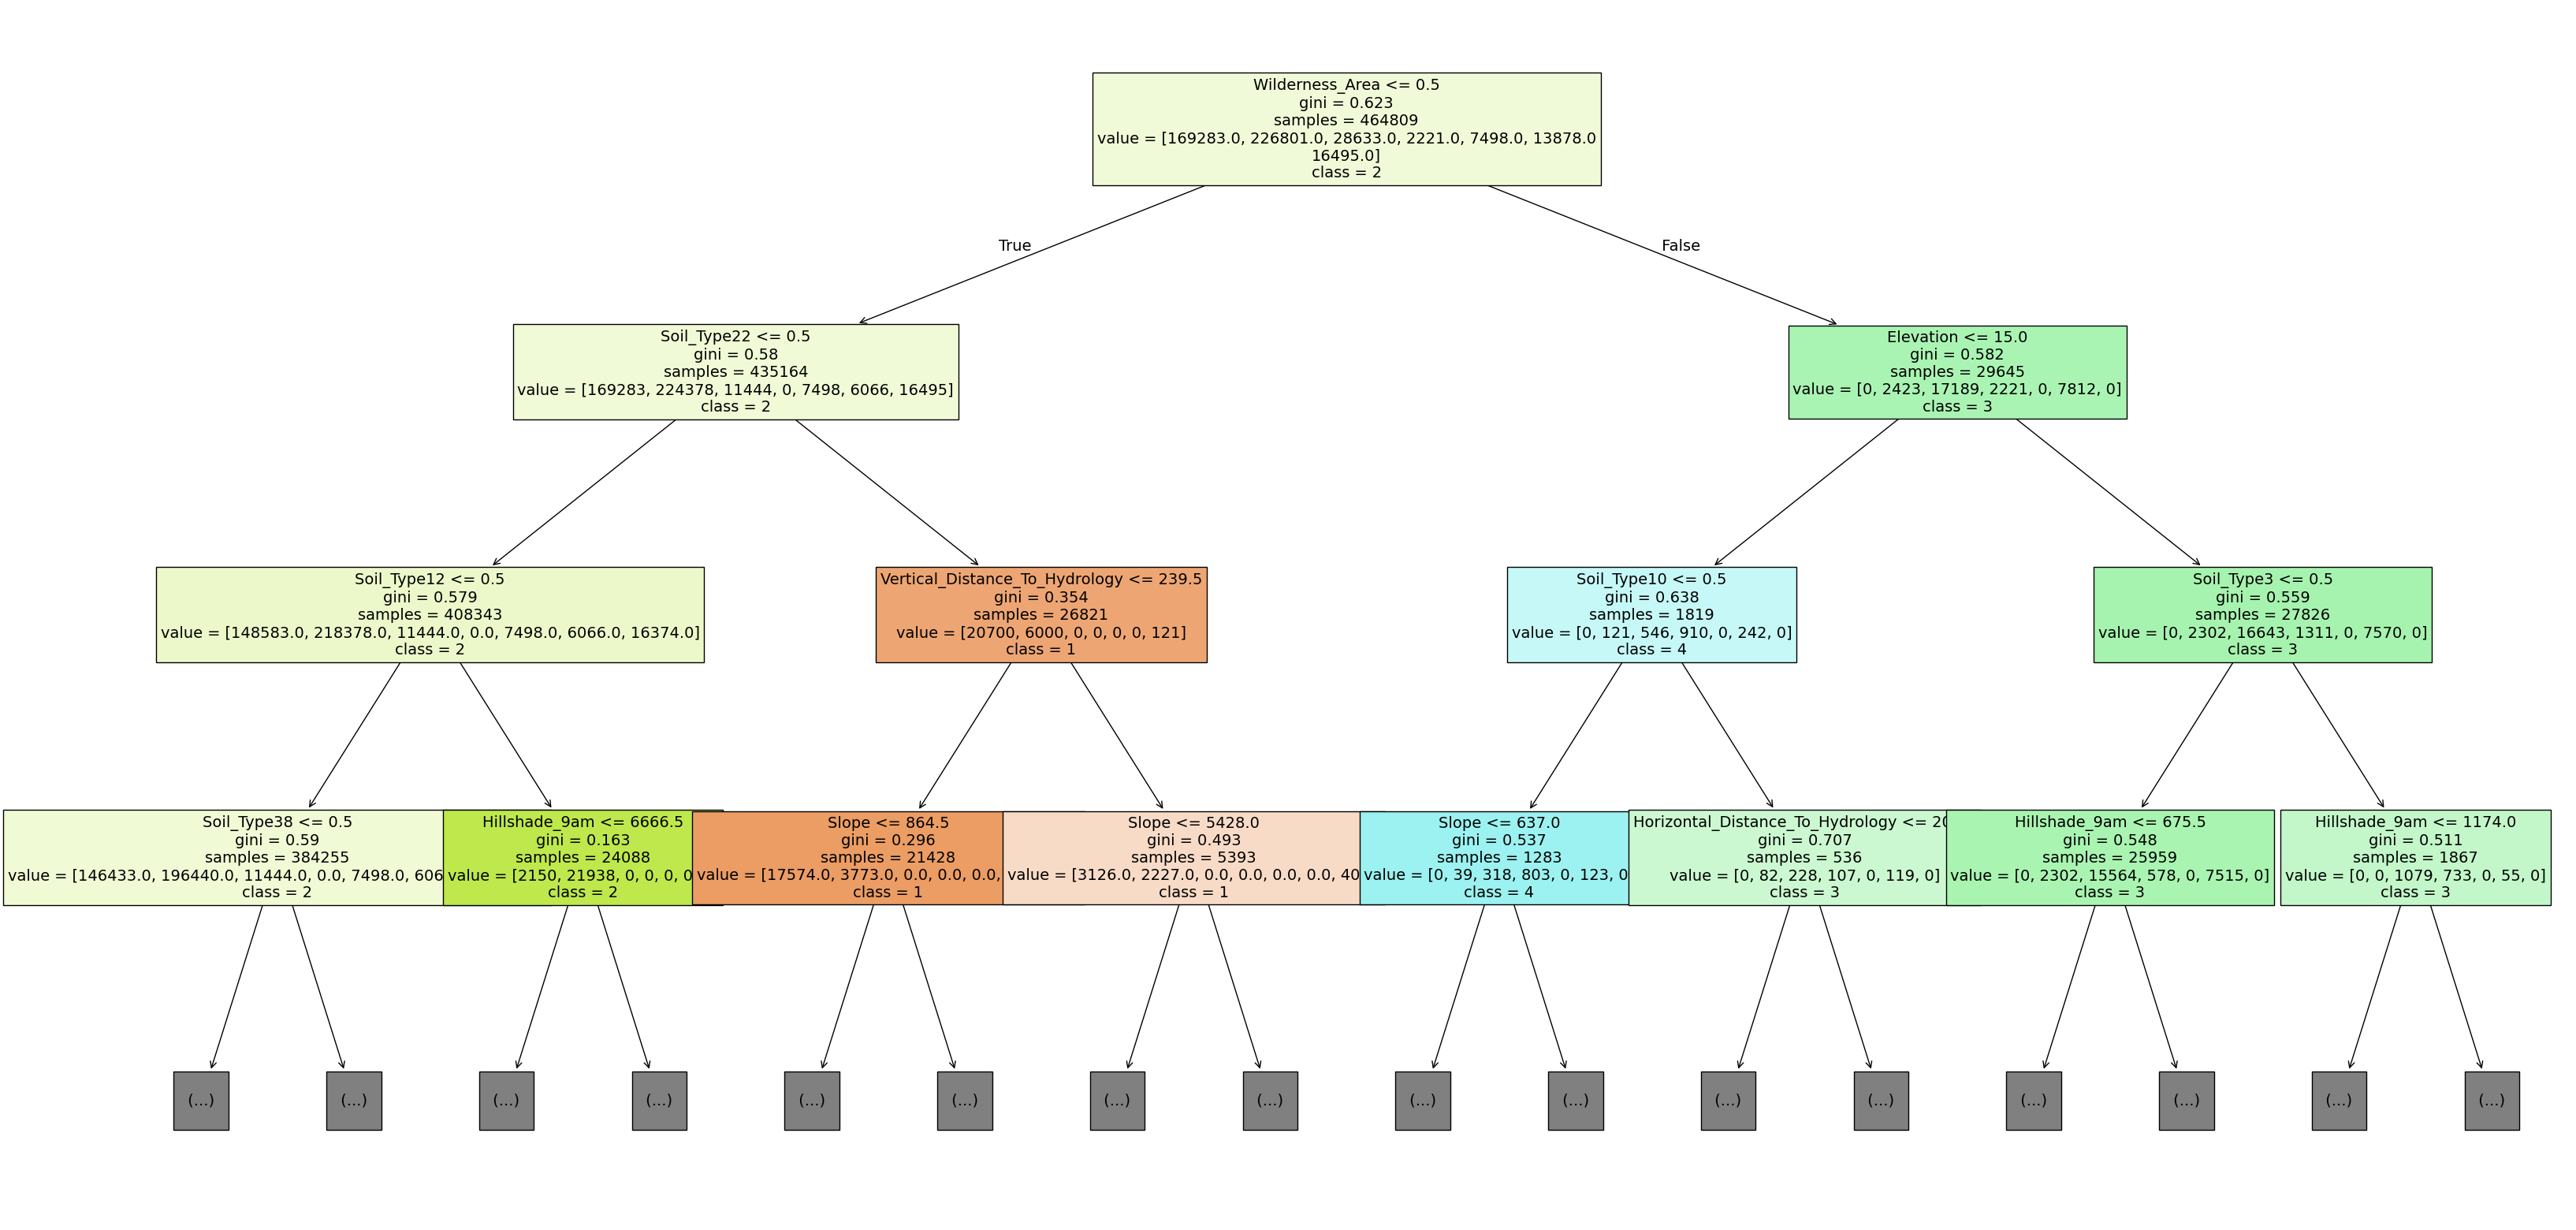

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))  # Más grande
plot_tree(
    model, 
    max_depth=3,  # Puedes subirlo a 4 si quieres ver más profundidad
    feature_names=X.columns, 
    class_names=[str(i) for i in sorted(y.unique())], 
    filled=True,
    fontsize=14  # Aumenta el tamaño del texto
)
plt.show()


¿Qué nos dice este árbol? / What is this tree telling us?

We used a decision tree to predict vegetation types in a natural area. The tree works like a path of questions, starting with:
“Is it in Wilderness Area 1?”
and moving on to others like:
“What’s the soil type?”, “How steep is the slope?”

Following this path, the model gets it right 91.6% of the time. Beyond accuracy, it helps us see which variables matter most to understand the landscape.

This helps with:

Land use planning,

Protecting natural zones,

Making quick field decisions.